In [4]:
#import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# EL Reclassification Data
df=pd.read_csv("filesreclass.csv", sep='\t')
df

,CDS,County,District,School,EL,FEP,Reclass
0,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,68,121,15
1,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,131,37,3
2,1100170124172,Alameda,Alameda County Office of Education,Yu Ming Charter,48,132,0
3,1100170125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,63,18,2
4,1100170129403,Alameda,Alameda County Office of Education,Epic Charter,0,0,1
...,...,...,...,...,...,...,...
10188,58727516056832,Yuba,Wheatland,Lone Tree Elementary,11,3,0
10189,58727516056840,Yuba,Wheatland,Wheatland Elementary,24,5,4
10190,58727516118806,Yuba,Wheatland,Wheatland Charter Academy,0,2,0
10191,58727690133751,Yuba,Wheatland Union High,Edward P. Duplex,6,6,0


In [18]:
df.columns
# df.info()

Index(['CDS', 'County', 'District', 'School', 'EL', 'FEP', 'Reclass'], dtype='object')

In [15]:
# Converting objects'String Values' into integers
label_encoders = {}
columns_to_encode = ['County', 'District', 'School']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
df.corr()

,CDS,County,District,School,EL,FEP,Reclass
CDS,1.000000,0.999970,0.222794,0.034742,0.024182,-0.032058,0.076062
County,0.999970,1.000000,0.223021,0.034936,0.023618,-0.032501,0.075307
District,0.222794,0.223021,1.000000,0.130568,-0.009020,-0.025637,-0.024773
School,0.034742,0.034936,0.130568,1.000000,-0.011861,-0.008867,-0.002166
EL,0.024182,0.023618,-0.009020,-0.011861,1.000000,0.516374,0.558263
FEP,-0.032058,-0.032501,-0.025637,-0.008867,0.516374,1.000000,0.426610
Reclass,0.076062,0.075307,-0.024773,-0.002166,0.558263,0.426610,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

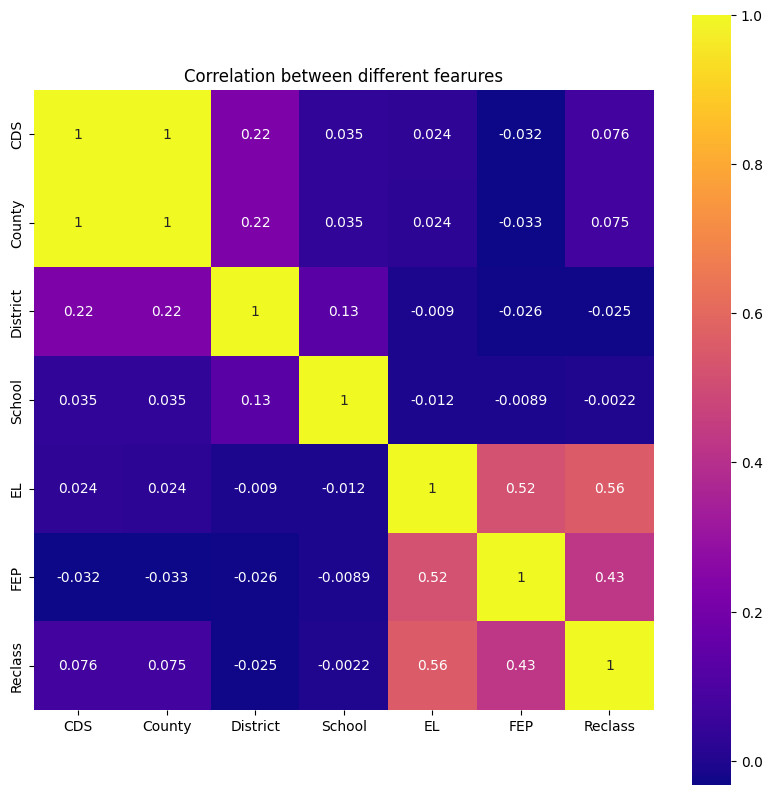

In [17]:

correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='plasma')

plt.title('Correlation between different features')

In [49]:

x_data = df[['EL', 'FEP']]
y_data = df['Reclass']

In [50]:

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=2000) # 70% training and 30%

In [51]:
#This is model generation

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#This is to evaluate the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27207325049051667
